AUTHORS: SEDA AYKUTLU -  JUAN MORALES CONDE 


In [2]:
# IMPORTING DATASET

from sklearn.datasets import load_breast_cancer
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
cancer = load_breast_cancer()


In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns= np.append(cancer['feature_names'], ['target']))

### Data Exploration

In [4]:
print("Cancer dataset dimensions : {}".format(df_cancer.shape))

Cancer dataset dimensions : (569, 31)


In [5]:
df_cancer.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


In [6]:
df_cancer.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

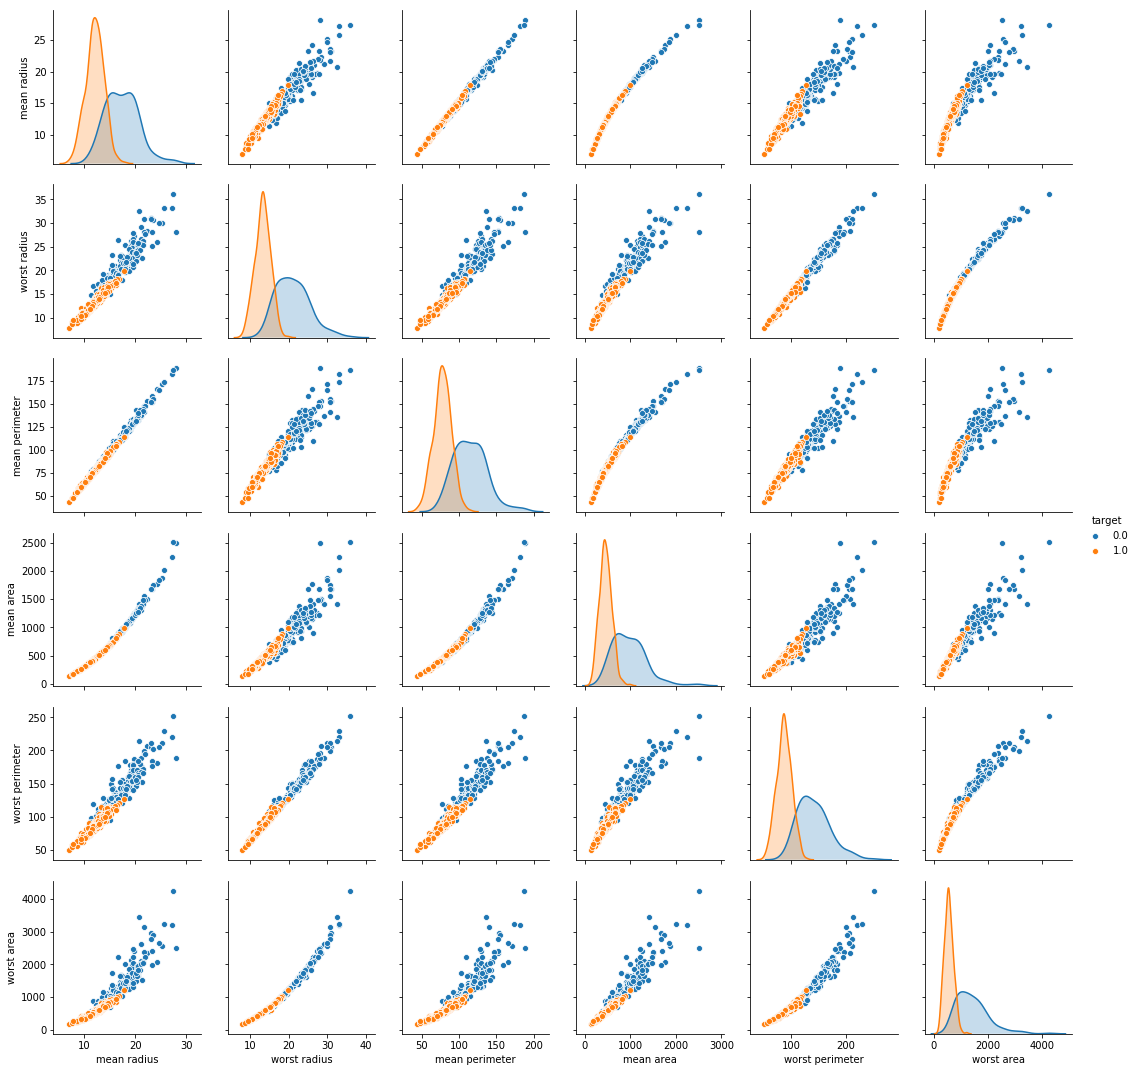

In [8]:
sns.pairplot(df_cancer,hue="target",vars=["mean radius","worst radius","mean perimeter","mean area","worst perimeter","worst area"])

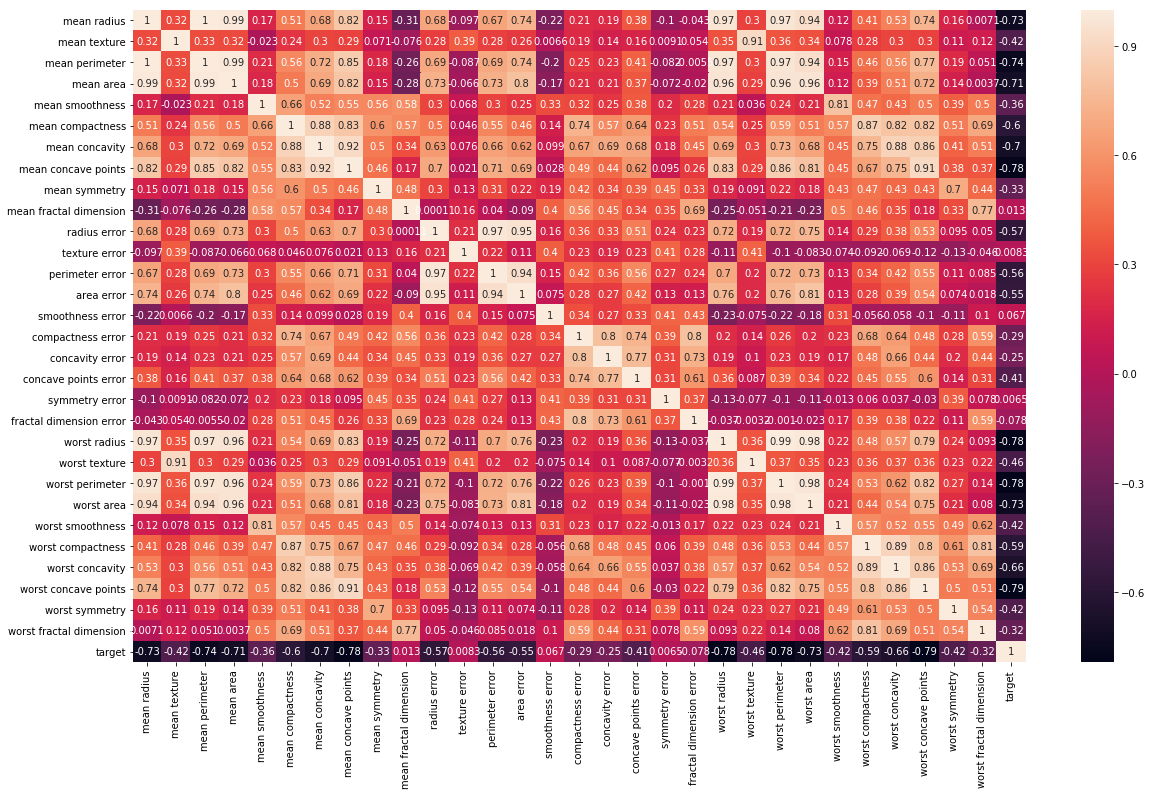

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cancer.corr(),annot=True)

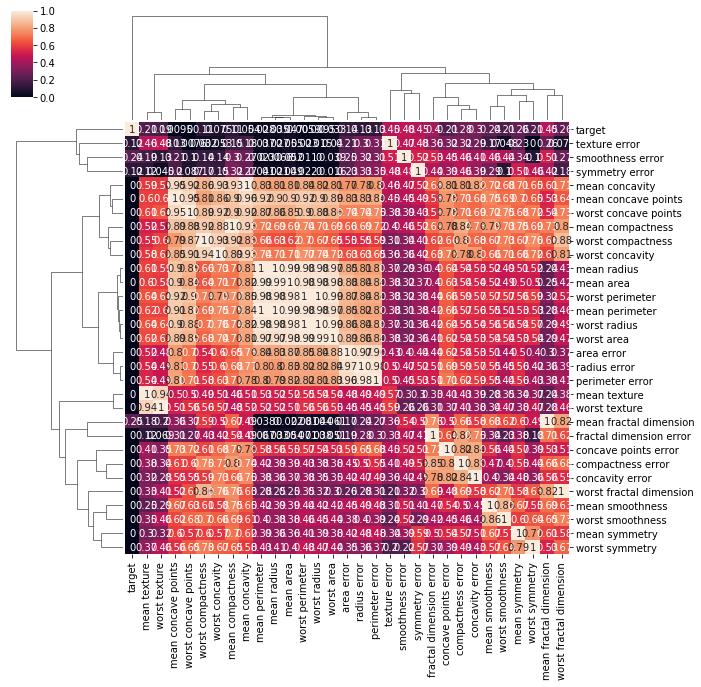

In [10]:
sns.clustermap(df_cancer.corr(),standard_scale=0,annot=True)

In [11]:
high_correlation = df_cancer.corr().abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
 
print(high_correlation_sort[30:50])

mean radius      mean radius        1.000000
mean perimeter   mean radius        0.997855
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
worst perimeter  worst radius       0.993708
mean area        mean radius        0.987357
mean radius      mean area          0.987357
mean perimeter   mean area          0.986507
mean area        mean perimeter     0.986507
worst area       worst radius       0.984015
worst radius     worst area         0.984015
worst area       worst perimeter    0.977578
worst perimeter  worst area         0.977578
perimeter error  radius error       0.972794
radius error     perimeter error    0.972794
mean perimeter   worst perimeter    0.970387
worst perimeter  mean perimeter     0.970387
worst radius     mean radius        0.969539
mean radius      worst radius       0.969539
worst radius     mean perimeter     0.969476
dtype: float64


##### Cancer dataset has been separated as X and Y (target) in order to build models up. It has two classification types, which are benign (no cancer) and malignant (cancer), defined as 0 and 1 respectively. In dataset, the number of malignant is higher than benign ones. 

In [12]:
X = df_cancer.drop(["target"],axis=1)
y = df_cancer["target"]

1.0    357
0.0    212
Name: target, dtype: int64


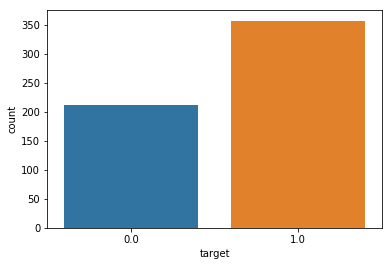

In [13]:
#Number of samples per category
print(df_cancer['target'].value_counts())
sns.countplot(df_cancer['target'],label="Count")

##### Dataset has 30 features, their names stated below.

In [14]:
##Number of features
X.shape[1]

30

In [15]:
X.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [16]:
#IMPORTING LIBRARIES
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

### DECIDING TO DO STRATIFY OR NOT

In [17]:
#SPLITTING TEST AND TRAINING DATA WITHOUT STRATIFY
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( X, y,stratify = None,test_size=0.20)

#Number of samples per category
train1 = y_train_1.value_counts()
test1 = y_test_1.value_counts()

#SPLITTING TEST AND TRAINING DATA WITH STRATIFY
X_train, X_test, y_train, y_test = train_test_split( X, y,stratify=y,test_size=0.20)
#Number of samples per category

#Number of samples per category
train = y_train.value_counts()
test = y_test.value_counts()

Text(0.5, 1.0, 'Stratified Train Data')

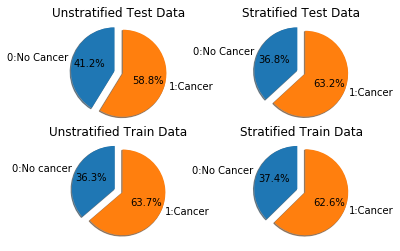

In [18]:
sizes= [test1[0],test1[1]]
labels = '0:No Cancer', '1:Cancer'
explode = (0.1, 0.1) 

ax1 = plt.subplot(221)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Unstratified Test Data')

sizes= [test[0],test[1]]
labels = '0:No Cancer', '1:Cancer'
explode = (0.1, 0.1) 

ax1 = plt.subplot(222)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Stratified Test Data')

sizes= [train1[0],train1[1]]
labels = '0:No cancer', '1:Cancer'
explode = (0.1, 0.1) 

ax2 = plt.subplot(223)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.#
plt.title('Unstratified Train Data')

sizes= [train[0],train[1]]
labels = '0:No Cancer', '1:Cancer'
explode = (0.1, 0.1) 

ax2 = plt.subplot(224)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Stratified Train Data')



##### There is very less difference between stratified dataset and unstratififed dataset in terms of theirs classification distribution. In fact, the train and test sets have approximately the same percentage of samples of each target class.  However, the difference between them is lower when the data is stratified. So that, we continue build up models with stratified data.  homojen 

### DECIDING THE NUMBER OF COMPONENTS IN PCA

In [19]:
#NORMALIZING DATA
miStdScaler = StandardScaler()
X_train = miStdScaler.fit_transform(X_train)
X_test = miStdScaler.fit_transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,LeaveOneOut

miknn=KNeighborsClassifier()

migrid = {"n_neighbors" : [1,3,5,7,9]}

b = []

for i in range(2,(X.shape[1])+1) :
    miPCA = PCA(n_components=i)
    miPCA.fit(X_train)
    X_train_pca = miPCA.transform(X_train)
    X_test_pca = miPCA.transform(X_test)
    migscv = GridSearchCV(estimator=miknn,param_grid=migrid,scoring="accuracy",verbose=0)
    migscv.fit(X_train_pca,y_train)
    miknnopt = migscv.best_estimator_
    y_pred = migscv.predict(X_test_pca)
    b.append(100*accuracy_score(y_test,y_pred))
print(b)

[95.6140350877193, 95.6140350877193, 99.12280701754386, 99.12280701754386, 98.24561403508771, 99.12280701754386, 99.12280701754386, 99.12280701754386, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771, 98.24561403508771]


Text(0, 0.5, 'Test Accuracy')

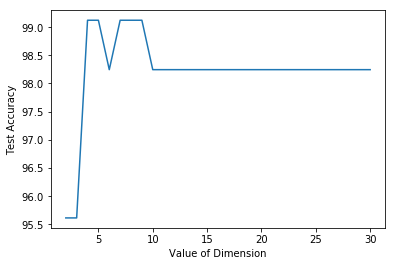

In [21]:
from matplotlib import pyplot as plt

plt.plot(range(2,(X.shape[1])+1),b)
plt.xlabel("Value of Dimension")
plt.ylabel("Test Accuracy")

Text(0, 0.5, 'Accuracy')

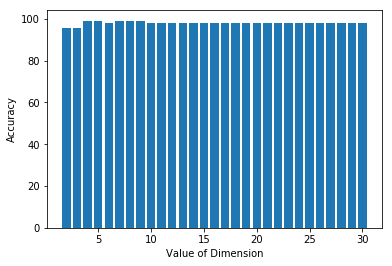

In [22]:
from matplotlib import pyplot as plt

plt.bar(range(2,(X.shape[1])+1),b)
plt.xlabel("Value of Dimension")
plt.ylabel("Accuracy")

#### The ideal value of PCA is starting from 15 according to accuracy rate. However, for now we choose 2 in order to be able to plot contour in the following steps.

### APPLICATION OF PCA

In [23]:
miPCA = PCA(n_components=2)
miPCA.fit(X_train)
X_train_pca = miPCA.transform(X_train)
X_test_pca = miPCA.transform(X_test)

### KNN Model with Kfold

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
miknn=KNeighborsClassifier()

In [25]:
miknn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
#CROSSVALIDATION WITH KFOLD
from sklearn.model_selection import GridSearchCV,LeaveOneOut

migrid = {"n_neighbors" : [1,3,5,7,9,11]}

migscv = GridSearchCV(estimator=miknn,param_grid=migrid,scoring="accuracy",cv=5,verbose=0,n_jobs=-1,return_train_score=True)

migscv.fit(X_train_pca,y_train)

miknnopt = migscv.best_estimator_

In [27]:
miknnopt

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [28]:
y_pred = miknnopt.predict(X_test_pca)
from sklearn.metrics import accuracy_score
t_pred = miknnopt.predict(X_train_pca)

print(100*accuracy_score(y_test,y_pred))
print(100*accuracy_score(y_train,t_pred))


95.6140350877193
94.5054945054945


In [29]:
kk=migscv.cv_results_
kk

{'mean_fit_time': array([0.00582056, 0.0028585 , 0.00291462, 0.00228734, 0.00416584,
        0.00230918]),
 'std_fit_time': array([0.00543706, 0.0025309 , 0.00061747, 0.00030527, 0.00260208,
        0.00110605]),
 'mean_score_time': array([0.01206799, 0.0163208 , 0.01518869, 0.01486893, 0.01509371,
        0.00906649]),
 'std_score_time': array([0.00192026, 0.00732536, 0.00135244, 0.00569681, 0.00603707,
        0.00258515]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.89010989, 0.89010989, 0.86813187, 0.87912088, 0.89010989,
        0.89010989]),
 'split1_test_score': array([0.89010989, 0.93406593, 0.92307692, 0.92307692, 0.93406593,
        0.93406593]),
 'split2_test_score': array(

In [30]:
std_test = kk["std_test_score"]
test = kk["mean_test_score"]
train = kk["mean_train_score"]


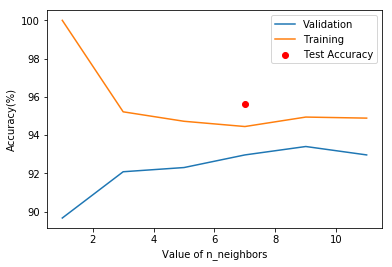

In [31]:
plt.plot([1,3,5,7,9,11],test*100,label='Validation')
plt.plot([1,3,5,7,9,11],train*100,label='Training')
plt.scatter(7,100*accuracy_score(y_test,y_pred),color="red",label = "Test Accuracy")
plt.xlabel("Value of n_neighbors")
plt.ylabel("Accuracy(%)")
plt.legend()


#### With k fold, optimum n_neighbor is 7,right before accuracy of validation and training has been seperated.  And since the test accuracy is higher than training accuracy, there is no overfitting problem in the model.

In [32]:
#CROSSVALIDATION WITH LEAVE-ONE-OUT
from sklearn.model_selection import GridSearchCV,LeaveOneOut
loo = LeaveOneOut()

migrid = {"n_neighbors" :[1,3,5,7,9,11]}

migscv = GridSearchCV(estimator=miknn,param_grid=migrid,scoring="accuracy",cv=loo,verbose=0,n_jobs=-1,return_train_score=True)

migscv.fit(X_train_pca,y_train)

miknnopt = migscv.best_estimator_

In [33]:
kk.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [34]:
miknnopt

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [35]:
100*(migscv.best_score_)

94.06593406593406

In [36]:
y_pred = miknnopt.predict(X_test_pca)
from sklearn.metrics import accuracy_score
y_pred_t = miknnopt.predict(X_train_pca)

print(100*accuracy_score(y_test,y_pred))
print(100*accuracy_score(y_train,y_pred_t))

95.6140350877193
94.94505494505493


In [37]:
kk=migscv.cv_results_

In [38]:
std_test = kk["std_test_score"]
std_test

array([0.30145964, 0.25935928, 0.25570179, 0.25570179, 0.24031537,
       0.23626118])

In [39]:
test = kk["mean_test_score"]
test

array([0.8989011 , 0.92747253, 0.92967033, 0.92967033, 0.93846154,
       0.94065934])

In [40]:
train = kk["mean_train_score"]
train

array([1.        , 0.94948928, 0.94724791, 0.94506947, 0.94511788,
       0.94952801])

[Text(0, 0, 'Test'), Text(0, 0, 'Train')]

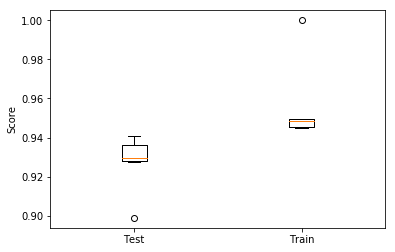

In [41]:
fig, ax = plt.subplots()
plt.boxplot([test,train])
plt.ylabel("Score")
ax.set_xticklabels(['Test', 'Train'])

#### Since they are too close to each other, overall model is not overfitting or underfitting. 

In [42]:
sum(miPCA.explained_variance_ratio_)

0.6307888760162238

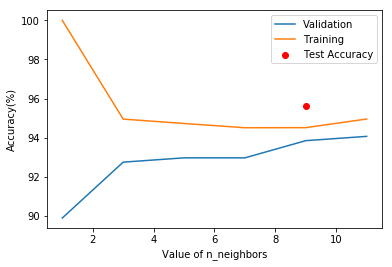

In [43]:
plt.plot([1,3,5,7,9,11],test*100,label='Validation')
plt.plot([1,3,5,7,9,11],train*100,label='Training')
plt.scatter(9,100*accuracy_score(y_test,y_pred),color="red",label = "Test Accuracy")
plt.xlabel("Value of n_neighbors")
plt.ylabel("Accuracy(%)")
plt.legend()


#### The model is overfitting when k value is below 3. The optimum model  is when k is 9, where validation and training accuracy is higher and closer to each other as well as has the smaller standard variation. Besides, test accuracy is higher than training accuracy,which means there is no overfitting problem in selected n_neighbors. 

#### ==> Introduce en el proceso de cross-validación el ajuste de los pesos de la métrica de distancia entre muestras de acuerdo al parámetro “weights” del modelo en scikit-learn:

In [44]:
#CROSSVALIDATION WITH LEAVE-ONE-OUT weights
from sklearn.model_selection import GridSearchCV,LeaveOneOut
loo = LeaveOneOut()


migrid = {"n_neighbors" : [1,3,5,7,9,11],"weights":["distance","uniform"]}

migscv = GridSearchCV(estimator=miknn,param_grid=migrid,scoring="accuracy",cv=loo,verbose=0,n_jobs=-1)

migscv.fit(X_train_pca,y_train)

miknnopt = migscv.best_estimator_

In [45]:
100*(migscv.best_score_)

94.06593406593406

In [46]:
miknnopt

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#### With the new metric "distance", the optimum model didnt change and still has 9 n_neighbors and uniform weight with p=2.

In [47]:
y_pred = miknnopt.predict(X_test_pca)
from sklearn.metrics import accuracy_score
y_pred_t = miknnopt.predict(X_train_pca)

print(100*accuracy_score(y_test,y_pred))
print(100*accuracy_score(y_train,y_pred_t))

95.6140350877193
94.94505494505493


#### Siguiendo la misma aproximación del último apartado, introduce el tipo de métrica de distancia (parámetro “metric”) dentro del proceso de validación cruzada.

In [48]:
#CROSSVALIDATION WITH LEAVE-ONE-OUT weights metrics
from sklearn.model_selection import GridSearchCV,LeaveOneOut
loo = LeaveOneOut()


migrid = {"n_neighbors" : [1,3,5,7,9],"weights":["distance","uniform"],"metric":["minkowski","manhattan","euclidean"],
          "p":[1,2,3,4,5]}

migscv = GridSearchCV(estimator=miknn,param_grid=migrid,scoring="accuracy",cv=loo,verbose=0,n_jobs=5)

migscv.fit(X_train_pca,y_train)

miknnopt = migscv.best_estimator_


In [49]:
miknnopt

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

#### Apart from default values, its added 2 metric more which are manhattan and euclidean, however the best model still has 9 n_neighbors, metric minkowski, weights uniform. As a difference, p=1 gives better accuracy compare to p=2. In cross validation, it has better score with p=1.

In [50]:
100*(migscv.best_score_)

94.28571428571428

In [51]:
y_pred = miknnopt.predict(X_test_pca)
from sklearn.metrics import accuracy_score
y_pred_t = miknnopt.predict(X_train_pca)

print(100*accuracy_score(y_test,y_pred))
print(100*accuracy_score(y_train,y_pred_t))

95.6140350877193
94.28571428571428


### VISUALISATION 

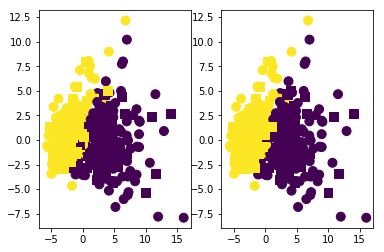

In [52]:
from matplotlib import pyplot as plt

plt.subplot(121)

plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=y_train)
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_test)

plt.subplot(122)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],s=80,c=y_train)
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],s=80,marker='s',c=y_pred)


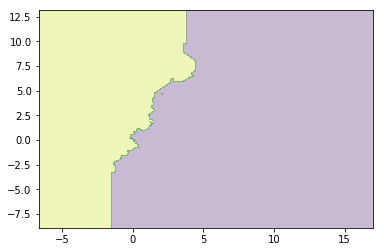

In [53]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = miknnopt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)